In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=bcafd61ee2d60069d53808f7eb73e53bb4e459dd16a1eafc07fbb3abcab1e12d
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col
from pyspark.sql import *

In [ ]:
spark = SparkSession.builder.getOrCreate()

In [1]:
bucket_name = "ipl_bucket_vinay"
file_path = "data/ipl_2022_dataset.csv"

In [ ]:
df = spark.read.csv(f"gs://{bucket_name}/{file_path}",header=True)

In [ ]:
df = spark.read.option("header", True).option('inferSchema',True).csv("/content/ipl_2022_dataset.csv")

In [ ]:
df.show()

+---+-------------------+----------+------------+---------------+---------------+----------+--------------+
|_c0|             Player|Base Price|        TYPE|COST IN ₹ (CR.)|Cost IN $ (000)|2021 Squad|          Team|
+---+-------------------+----------+------------+---------------+---------------+----------+--------------+
|  0|        Rashid Khan|Draft Pick|      BOWLER|           15.0|         1950.0|       SRH|Gujarat Titans|
|  1|      Hardik Pandya|Draft Pick| ALL-ROUNDER|           15.0|         1950.0|        MI|Gujarat Titans|
|  2|    Lockie Ferguson|      2 Cr|      BOWLER|           10.0|         1300.0|       KKR|Gujarat Titans|
|  3|      Rahul Tewatia|   40 Lakh| ALL-ROUNDER|            9.0|         1170.0|        RR|Gujarat Titans|
|  4|       Shubman Gill|Draft Pick|      BATTER|            8.0|         1040.0|       KKR|Gujarat Titans|
|  5|     Mohammad Shami|      2 Cr|      BOWLER|           6.25|          812.5|      PBKS|Gujarat Titans|
|  6|         Yash Dayal|   

In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Player: string (nullable = true)
 |-- Base Price: string (nullable = true)
 |-- TYPE: string (nullable = true)
 |-- COST IN ₹ (CR.): double (nullable = true)
 |-- Cost IN $ (000): double (nullable = true)
 |-- 2021 Squad: string (nullable = true)
 |-- Team: string (nullable = true)



In [ ]:
df.select('Base Price').distinct().collect()

[Row(Base Price='20 Lakh'),
 Row(Base Price='2 Cr'),
 Row(Base Price='Draft Pick'),
 Row(Base Price='40 Lakh'),
 Row(Base Price='30 Lakh'),
 Row(Base Price='1 Cr'),
 Row(Base Price='50 Lakh'),
 Row(Base Price='1.5 Cr'),
 Row(Base Price='75 Lakh'),
 Row(Base Price='Retained')]

In [ ]:
#Distribution of values inside column 'Base Price'

df.groupBy('Base Price').count().show()

+----------+-----+
|Base Price|count|
+----------+-----+
|   20 Lakh|  344|
|      2 Cr|   48|
|Draft Pick|    6|
|   40 Lakh|   17|
|   30 Lakh|    9|
|      1 Cr|   33|
|   50 Lakh|  104|
|    1.5 Cr|   20|
|   75 Lakh|   26|
|  Retained|   27|
+----------+-----+



DATA TRANSFORMATION

In [ ]:
#Rename Column

df2 = df.withColumnRenamed("Player","player")\
      .withColumnRenamed("Base Price","base_price")\
      .withColumnRenamed("Type","type") \
      .withColumnRenamed("COST IN ₹ (CR.)","cost_inr") \
      .withColumnRenamed("Cost IN $ (000)","cost_usd") \
      .withColumnRenamed("2021 Squad","2021_team") \
      .withColumnRenamed("Team","2022_team")

In [ ]:
df2.show(5)

+---+---------------+----------+-----------+--------+--------+---------+--------------+
|_c0|         player|base_price|       type|cost_inr|cost_usd|2021_team|     2022_team|
+---+---------------+----------+-----------+--------+--------+---------+--------------+
|  0|    Rashid Khan|Draft Pick|     BOWLER|    15.0|  1950.0|      SRH|Gujarat Titans|
|  1|  Hardik Pandya|Draft Pick|ALL-ROUNDER|    15.0|  1950.0|       MI|Gujarat Titans|
|  2|Lockie Ferguson|      2 Cr|     BOWLER|    10.0|  1300.0|      KKR|Gujarat Titans|
|  3|  Rahul Tewatia|   40 Lakh|ALL-ROUNDER|     9.0|  1170.0|       RR|Gujarat Titans|
|  4|   Shubman Gill|Draft Pick|     BATTER|     8.0|  1040.0|      KKR|Gujarat Titans|
+---+---------------+----------+-----------+--------+--------+---------+--------------+
only showing top 5 rows



In [ ]:
df2.createOrReplaceTempView('ipl')

In [ ]:
your_table_name = "ipl"
df3 = spark.table(your_table_name)

In [ ]:
columns_to_replace = ['2021_team', '2022_team']

In [ ]:
for column in columns_to_replace:
    df3 = df3.withColumn(column, when(col(column).isNull(), 'None').otherwise(col(column)))

In [ ]:
df3.show()

+---+-------------------+----------+------------+--------+--------+---------+--------------+
|_c0|             player|base_price|        type|cost_inr|cost_usd|2021_team|     2022_team|
+---+-------------------+----------+------------+--------+--------+---------+--------------+
|  0|        Rashid Khan|Draft Pick|      BOWLER|    15.0|  1950.0|      SRH|Gujarat Titans|
|  1|      Hardik Pandya|Draft Pick| ALL-ROUNDER|    15.0|  1950.0|       MI|Gujarat Titans|
|  2|    Lockie Ferguson|      2 Cr|      BOWLER|    10.0|  1300.0|      KKR|Gujarat Titans|
|  3|      Rahul Tewatia|   40 Lakh| ALL-ROUNDER|     9.0|  1170.0|       RR|Gujarat Titans|
|  4|       Shubman Gill|Draft Pick|      BATTER|     8.0|  1040.0|      KKR|Gujarat Titans|
|  5|     Mohammad Shami|      2 Cr|      BOWLER|    6.25|   812.5|     PBKS|Gujarat Titans|
|  6|         Yash Dayal|   20 Lakh|      BOWLER|     3.2|   416.0|     None|Gujarat Titans|
|  7|       David Miller|      1 Cr|      BATTER|     3.0|   390.0|   

In [ ]:
unique_types = df.select('TYPE').distinct().rdd.map(lambda row: row.TYPE).collect()

In [ ]:
print("Unique Values in 'TYPE' Column:")
for value in unique_types:
    print(value)

Unique Values in 'TYPE' Column:
WICKETKEEPER
BOWLER
ALL-ROUNDER
BATTER


In [ ]:
base_price_distribution = df.select('Base Price').collect()

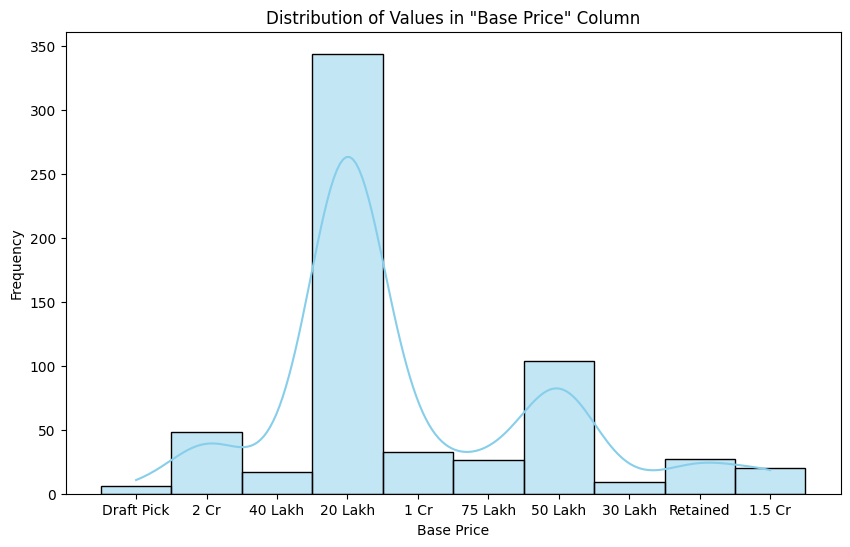

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(base_price_distribution['Base Price'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Values in "Base Price" Column')
plt.xlabel('Base Price')
plt.ylabel('Frequency')
plt.show()

TOP BATSMAN WHO GOT PAID

In [ ]:
result_df_batters = spark.sql("""
    SELECT player, CAST(cost_inr AS DECIMAL(10, 2)) as cost_inr
    FROM (
        SELECT player, cost_inr, DENSE_RANK() OVER (ORDER BY CAST(cost_inr AS DECIMAL(10, 2)) DESC) as rnk
        FROM ipl
        WHERE type = 'BATTER' AND cost_inr IS NOT NULL
    )
    WHERE rnk <= 9
    ORDER BY cost_inr ASC
""")

In [ ]:
players_batters = result_df_batters.rdd.map(lambda row: row['player']).collect()
costs_batters = result_df_batters.rdd.map(lambda row: row['cost_inr']).collect()

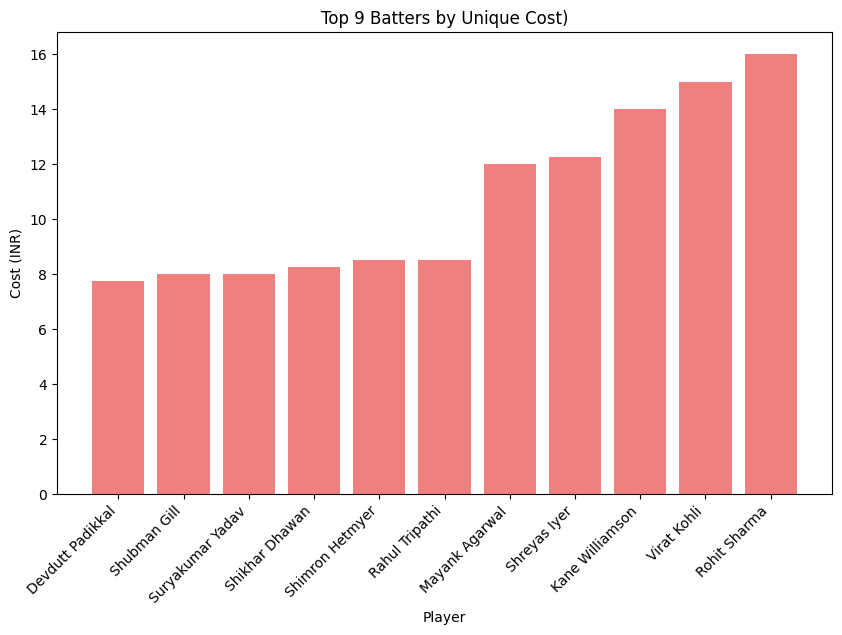

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(players_batters, costs_batters, color='lightcoral')
plt.title('Top 9 Batters by Unique Cost)')
plt.xlabel('Player')
plt.ylabel('Cost (INR)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

TOP BOWLERS BY PRICE

In [ ]:
result_df_bowlers = spark.sql("""
    SELECT player, CAST(cost_inr AS DECIMAL(10, 2)) as cost_inr
    FROM (
        SELECT player, cost_inr, DENSE_RANK() OVER (ORDER BY CAST(cost_inr AS DECIMAL(10, 2)) DESC) as rnk
        FROM ipl
        WHERE type = 'BOWLER' AND cost_inr IS NOT NULL
    )
    WHERE rnk <= 5
    ORDER BY cost_inr DESC
""")

In [ ]:
players_bowlers = result_df_bowlers.rdd.map(lambda row: row['player']).collect()
costs_bowlers = result_df_bowlers.rdd.map(lambda row: row['cost_inr']).collect()

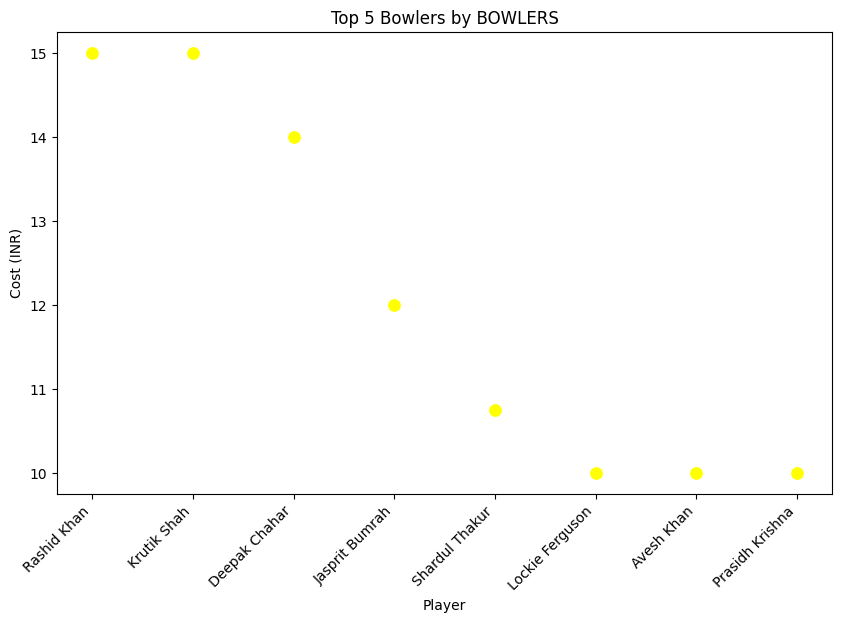

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=players_bowlers, y=costs_bowlers, color='yellow', s=100)  # 's' parameter sets marker size
plt.title('Top 5 Bowlers by BOWLERS')
plt.xlabel('Player')
plt.ylabel('Cost (INR)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

What is the Average pay for Batsman, Bowler, All-Rounder, Wicket-Keeper?

In [ ]:
result_df = spark.sql("""
    SELECT type, ROUND(AVG(cost_inr), 2) AS average_price
    FROM ipl
    GROUP BY type
    ORDER BY average_price DESC
""")

In [ ]:
types = result_df.rdd.map(lambda row: row['type']).collect()
avg_prices = result_df.rdd.map(lambda row: row['average_price']).collect()

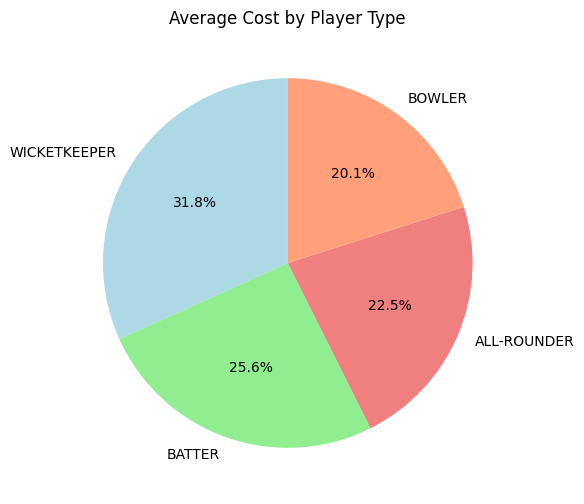

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(avg_prices, labels=types, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])
plt.title('Average Cost by Player Type')
plt.show()

List of Retained players with team name and salary?

In [ ]:
result_df_retained = spark.sql("""
    SELECT player, 2021_team, CAST(cost_inr AS DECIMAL(10, 2)) as cost_inr
    FROM ipl
    WHERE base_price = 'Retained'
    ORDER BY cost_inr DESC
    LIMIT 8
""")

In [ ]:
players_retained = result_df_retained.rdd.map(lambda row: row['player']).collect()
teams_retained = result_df_retained.rdd.map(lambda row: row['2021_team']).collect()
costs_retained = result_df_retained.rdd.map(lambda row: row['cost_inr']).collect()

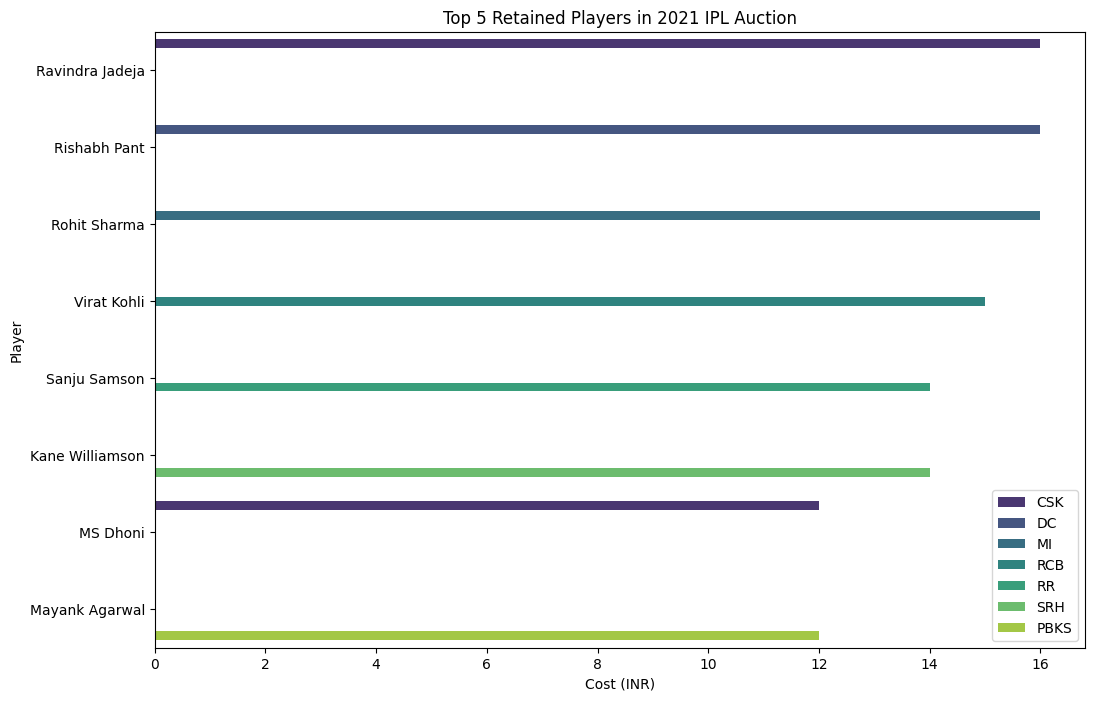

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=costs_retained, y=players_retained, hue=teams_retained, palette='viridis', dodge=True)
plt.title('Top 5 Retained Players in 2021 IPL Auction')
plt.xlabel('Cost (INR)')
plt.ylabel('Player')
plt.show()

In [ ]:
result_df_highest = spark.sql("""
    SELECT type, player, 2021_team, cost_inr
    FROM (
        SELECT type, player, 2021_team, cost_inr,
               ROW_NUMBER() OVER (PARTITION BY type ORDER BY cost_inr DESC) as row_num
        FROM ipl
    ) ranked
    WHERE row_num = 1
""")

In [ ]:
player_types = result_df_highest.rdd.map(lambda row: row['type']).collect()
players_highest = result_df_highest.rdd.map(lambda row: row['player']).collect()
teams_highest = result_df_highest.rdd.map(lambda row: row['2021_team']).collect()
costs_highest = result_df_highest.rdd.map(lambda row: row['cost_inr']).collect()

Text(0, 0.5, 'Cost (INR)')

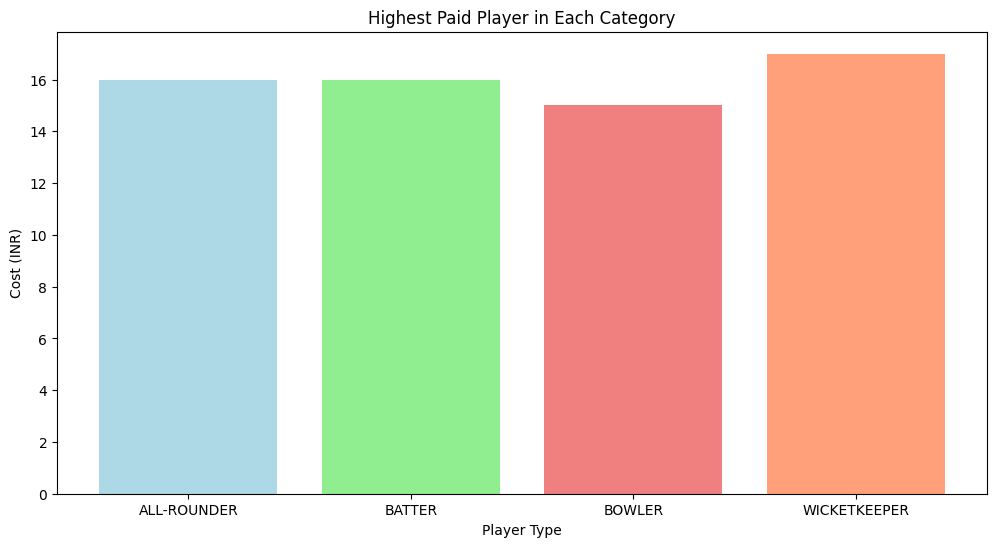

In [ ]:
plt.figure(figsize=(12, 6))
bars = plt.bar(player_types, costs_highest, color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Highest Paid Player in Each Category')
plt.xlabel('Player Type')
plt.ylabel('Cost (INR)')